# Customer Churn of Telecom Company

## Introduction:
- Customer churn is a term used to describe the loss of customers from a business. In this project, we will analyze the customer churn of a telecom company.
- We will use the dataset from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### Import Libraries

```python

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the dataset
df = pd.read_csv('/Users/adeel/OneDrive/Documents/GitHub/telco-customer-churn/data/data.csv')
pd.set_option('display.max_columns', None)
# Display the first few rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Display the shape of the dataframe
df.shape

print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataset has 7043 rows and 21 columns.


In [6]:
# display all the columns in the dataframe
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# check the null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# check the duplicate values in the dataset
print(df.duplicated().sum())


0


In [7]:
# display all columns and their data types when i use head() function
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# check the unique values in the dataset
df.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [17]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
# We observed that the TotalCharges column is an object data type. We will convert it to a numeric data type.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [19]:
# checking the data type of the total charges column
df['TotalCharges'].dtype

dtype('float64')

In [21]:
# checking null values in the total charges column
print(df['TotalCharges'].isnull().sum())


11


In [22]:
# Removing the rows with missing values in the dataset column
df = df.dropna()

# checking the shape of the dataset after removing the missing values
df.shape

(7032, 21)

In [23]:
# maping churn column to 0 and 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [24]:
# converting the categorical columns to category data type
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [25]:
# checking the data types of the columns
df.dtypes

customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object

In [26]:
# describe the dataset
df.describe()
df.describe(include='category')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


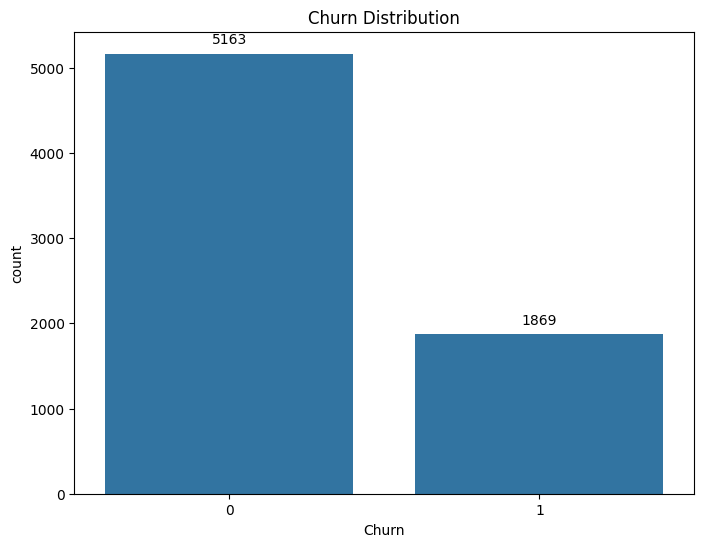

In [29]:
# Churn Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

This graph gives us a quick overview of the overall churn rate. In this "Yes" bar is significantly smaller than the "No" bar, it means the dataset is imbalanced (more non-churned customers). Imbalanced datasets can affect model performance.
From the telco data, we can see that the data is imbalanced, and we will need to consider that when building our predictive model.

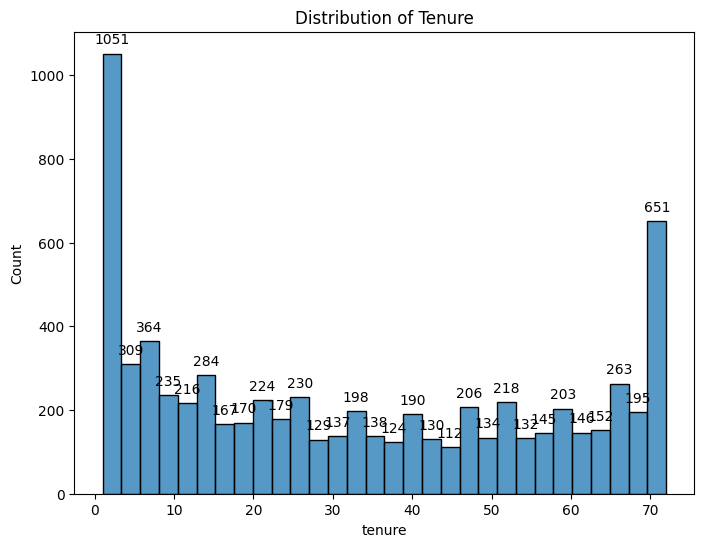

In [30]:
# Distribution of Tenure
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['tenure'], bins=30)
plt.title('Distribution of Tenure')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

This histogram shows how long customers typically stay with the company.
A bimodal distribution (two peaks) is observed in churn dataset. One peak usually represents customers who churn early (within a few months), and the other peak might represent customers who stay for a longer period.
From the telco data, we see many customers leave within the first few months.

Text(0, 0.5, 'Churn Rate')

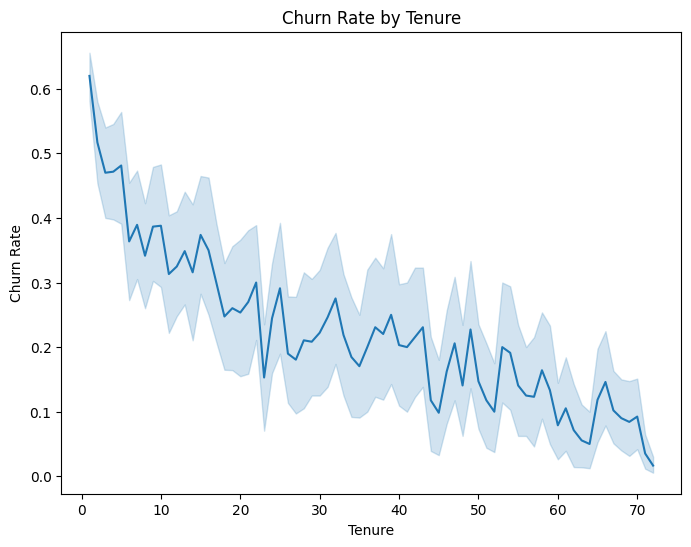

In [40]:
# create a line chart with tenure on x-axis and count on y-axis. it should show the churn rate
plt.figure(figsize=(8, 6))
sns.lineplot(x='tenure', y='Churn', data=df)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')


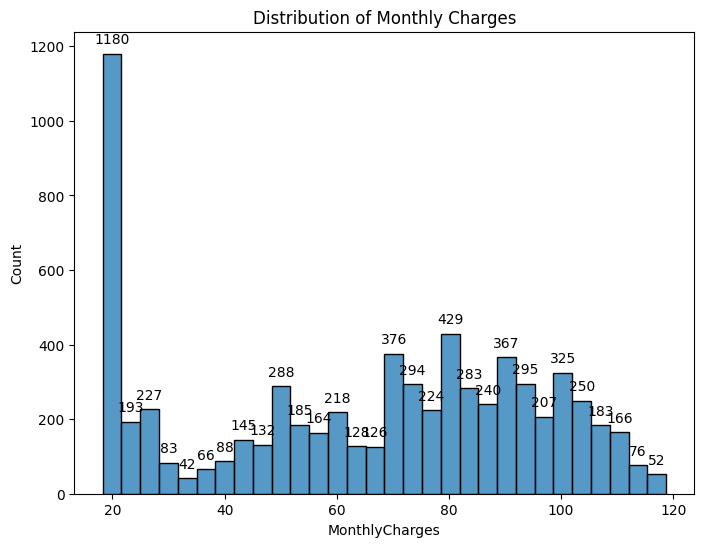

In [31]:
# Distribution of Monthly Charges
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['MonthlyCharges'], bins=30)
plt.title('Distribution of Monthly Charges')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

Distribution of Monthly Charges (Histogram):

This graph shows the range of monthly charges and how they are distributed.
It can help identify if there are any distinct groups of customers based on their spending.
From the telco data we see that the monthly charges are quite varied.

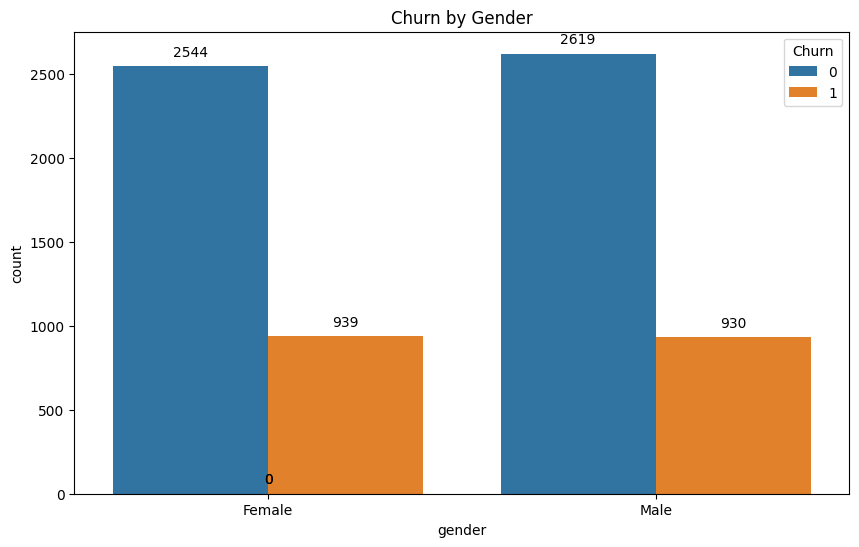

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

This graph compares the churn rates between male and female customers.
As the "Yes" bars are similar in height for both genders, it suggests that gender may not be a strong predictor of churn.
From the telco data, we can see that gender has very little effect on churn.

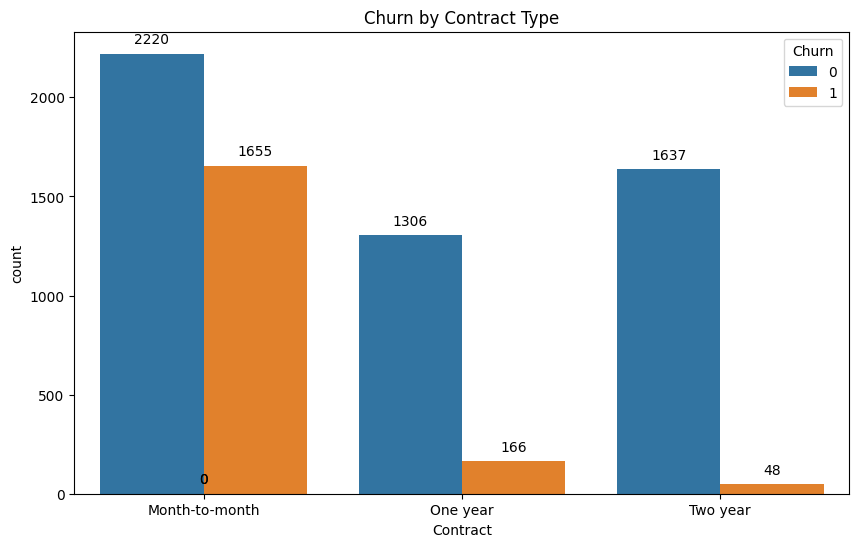

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

This graph examines how contract type influences churn.
Month-to-month contracts usually have higher churn rates compared to longer-term contracts.
From the telco data, we can see month to month contracts have a very high churn rate.

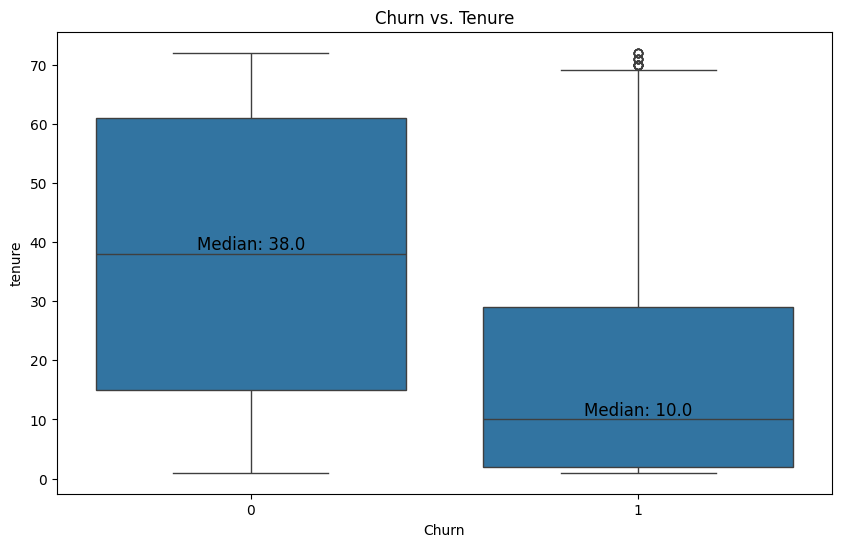

In [35]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs. Tenure')

# Add median values as annotations
medians = df.groupby('Churn')['tenure'].median()
for i, median in enumerate(medians):
    ax.text(i, median, f'Median: {median:.1f}', 
            ha='center', va='bottom', 
            color='black', fontsize=12)

plt.show()

This graph visualizes the relationship between customer tenure and churn.
It typically shows that customers with shorter tenures are more likely to churn.
From the telco data we can see that the shorter the tenure, the higher the churn rate.

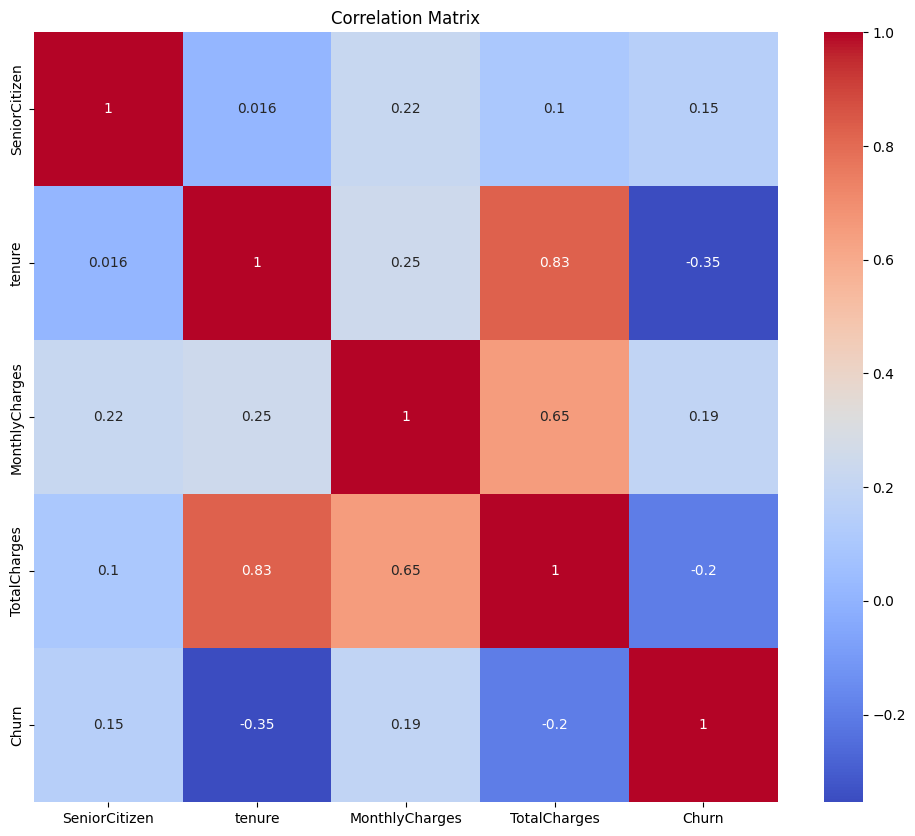

In [39]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation between numerical features.
Positive correlations (darker colors) indicate that two features tend to increase or decrease together.
Negative correlations (lighter colors) indicate that one feature increases while the other decreases.
It helps identify features that might be strongly related to churn.
From the telco data, we can see that tenure and total charges have a high positive correlation. Monthly charges also have a positive correlation with total charges.

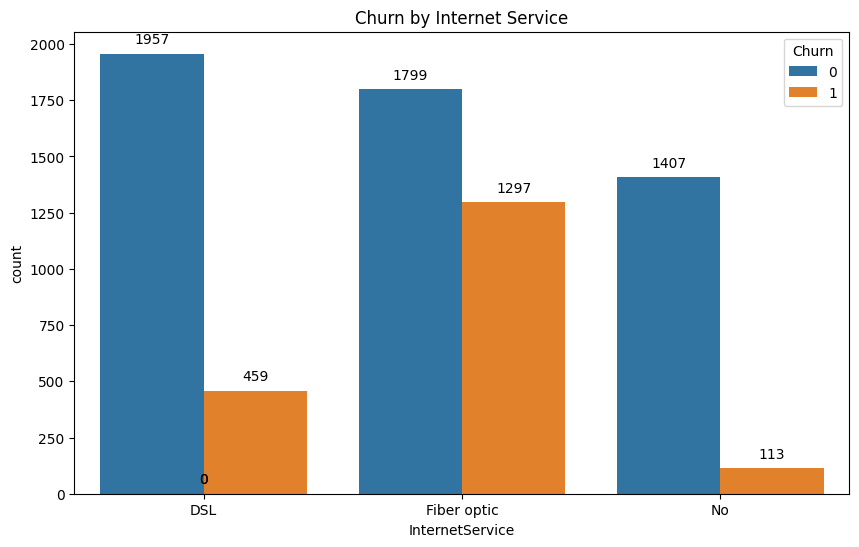

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

Description:

This graph shows the churn rate of the customer based on their internet service provider.
From the telco data, we can see that fiber optic internet service has a much higher churn rate than DSL.

Key Takeaways from the Graphs:

Contract Type: Month-to-month contracts are a significant driver of churn.


Tenure: Shorter tenure is associated with higher churn.


Internet Service: Customers with fiber optic internet service are more likely to churn.


Total Charges and Monthly Charges: These numerical features are correlated and may influence churn.


Gender: Gender does not seem to be a large factor in churn.


Data Imbalance: The dataset is imbalanced, with more non-churned customers.